In [23]:
# Data manipulation
import pandas as pd
import numpy as np

# Preprocessing and feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import sklearn.tree as tr
import sklearn.model_selection as ms
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
import sklearn.neighbors as knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [24]:
file_path = 'C://Users//Data Science//Machine Learning//Assignment//Dataset//healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [26]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [27]:
# Drop the 'id' column as it's not useful for prediction
df.drop('id', axis=1, inplace=True)

# Handling missing values in 'bmi' column using mean imputation
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [28]:
# Encode categorical variables
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['ever_married'] = encoder.fit_transform(df['ever_married'])
df['work_type'] = encoder.fit_transform(df['work_type'])
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])

# Display the preprocessed data
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


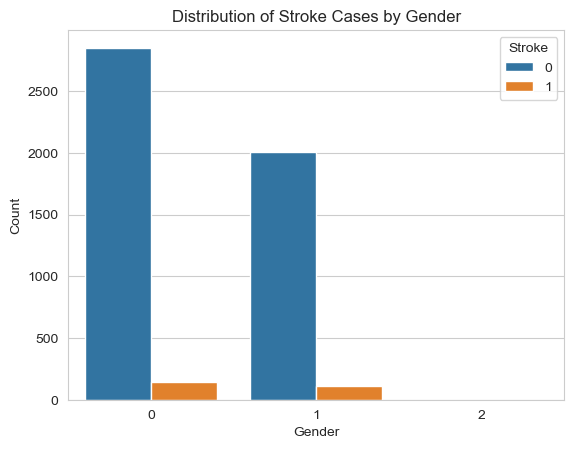

In [29]:
# Set style
sns.set_style("whitegrid")

# Visualization 1: Distribution of Stroke Cases by Gender
plt.figure()
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Distribution of Stroke Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.show()

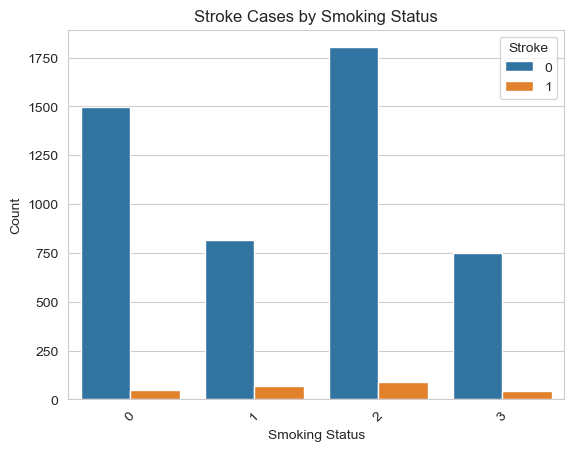

In [30]:
# Visualization 3: Stroke Cases by Smoking Status
#plt.figure(figsize=(18, 5))
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Stroke Cases by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.xticks(rotation=45)
plt.show()

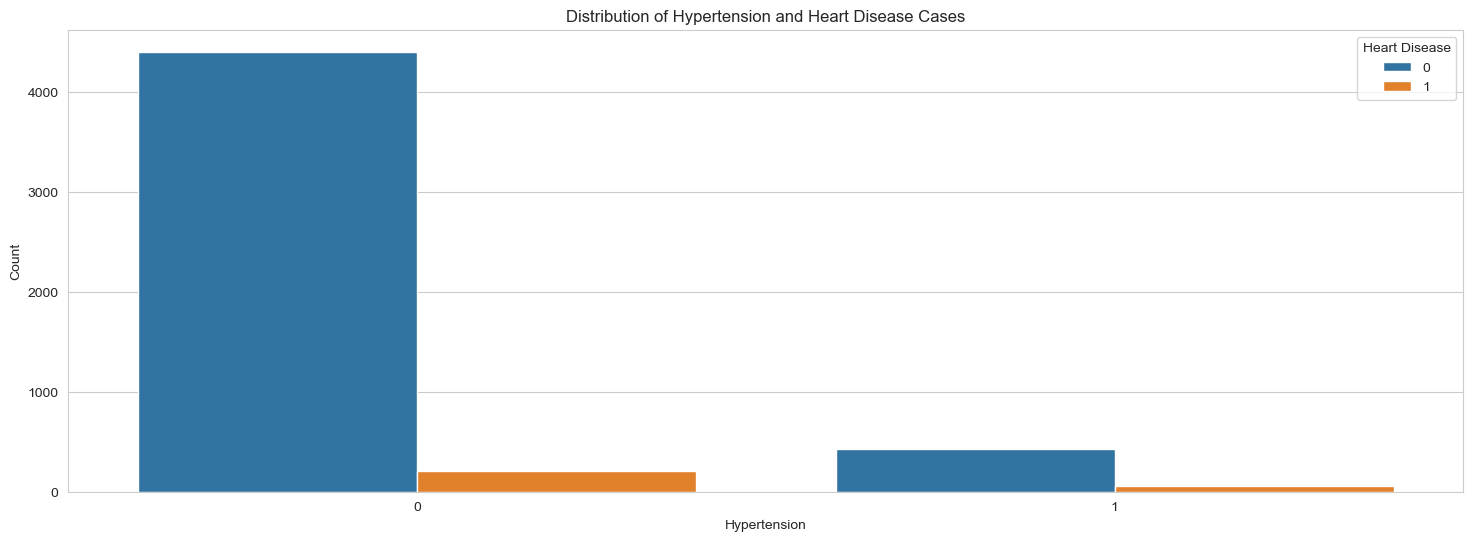

In [31]:
# Visualization 4: Distribution of Hypertension and Heart Disease Cases
plt.figure(figsize=(18, 6))
sns.countplot(x='hypertension', hue='heart_disease', data=df)
plt.title('Distribution of Hypertension and Heart Disease Cases')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

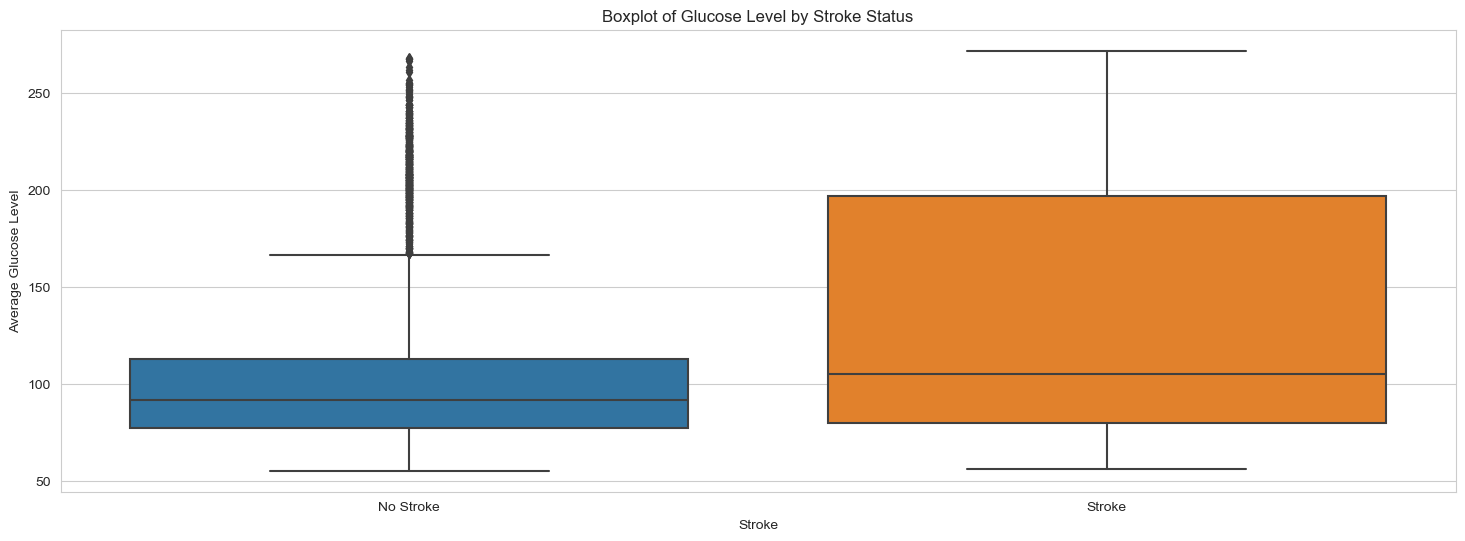

In [32]:
# Visualization 5: Boxplot of Glucose Level by Stroke Status
plt.figure(figsize=(18, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Boxplot of Glucose Level by Stroke Status')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

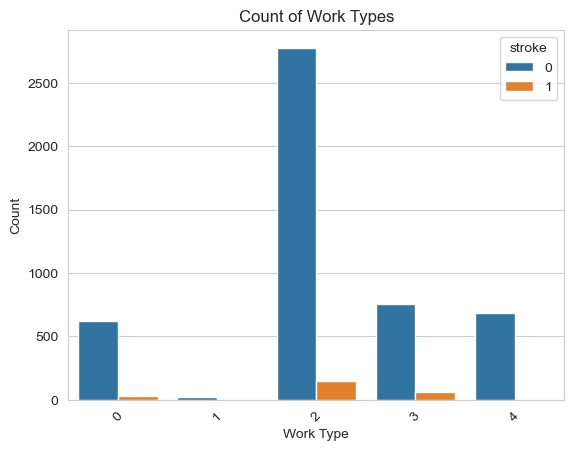

In [33]:
# Visualization 7: Count of Work Types
#plt.figure(figsize=(18, 6))
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Count of Work Types')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Split the data into features and target variable
x = df.drop('stroke', axis=1)
y = df['stroke']

# Assuming X and y are your features and labels
# Step 1: Resample the data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Step 2: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.8, random_state=42)

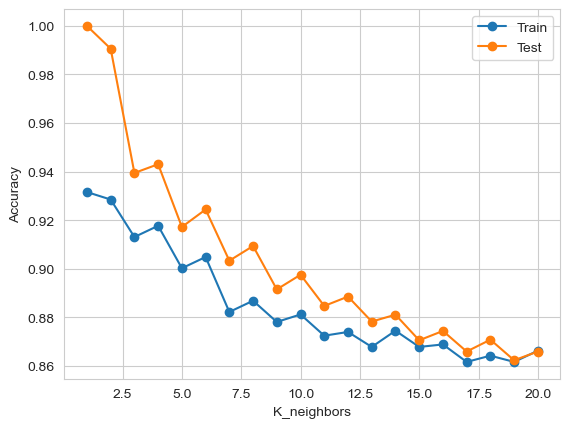

In [35]:
Acc_tr=[]
Acc_tes=[]
MD=[]
for i in range(1,21):
    KNN=knn.KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    KNN.fit(x_test,y_test)
    Acc_tr.append(KNN.score(x_train,y_train))
    Acc_tes.append(KNN.score(x_test,y_test))
    MD.append(i)
# Visulaize ACC
plt.figure()
plt.plot(MD, Acc_tr, label='Train',marker='o')
plt.plot(MD, Acc_tes, label='Test',marker='o')
plt.xlabel('K_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy: 0.8131910516842376
precision: 0.7851143257116192
Recall: 0.863484731845009
F1: 0.8224367591347916


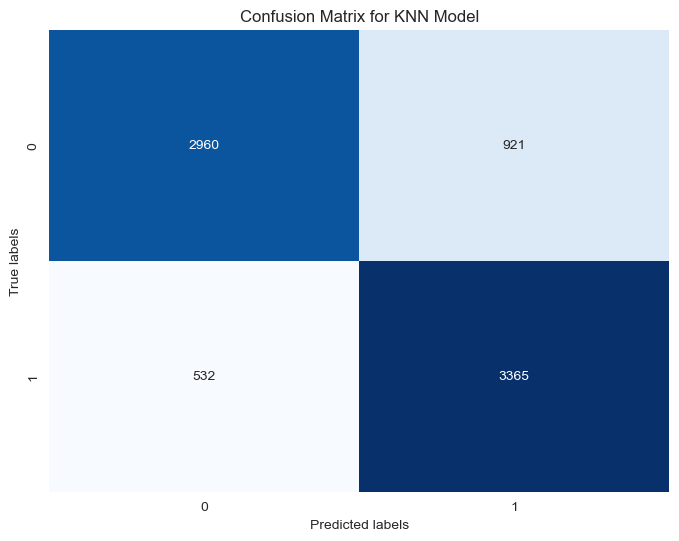

In [36]:
# Step 3: Feature Scaling (Optional, but recommended for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Step 4: Instantiate and train KNN classifier
KNN=knn.KNeighborsClassifier(n_neighbors=20)
KNN.fit(X_train_scaled, y_train)

# Step 5: Evaluate the model
y_pred = KNN.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("precision:", precision)
print("Recall:", recall)
print("F1:", f1)

cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN Model')
plt.show()

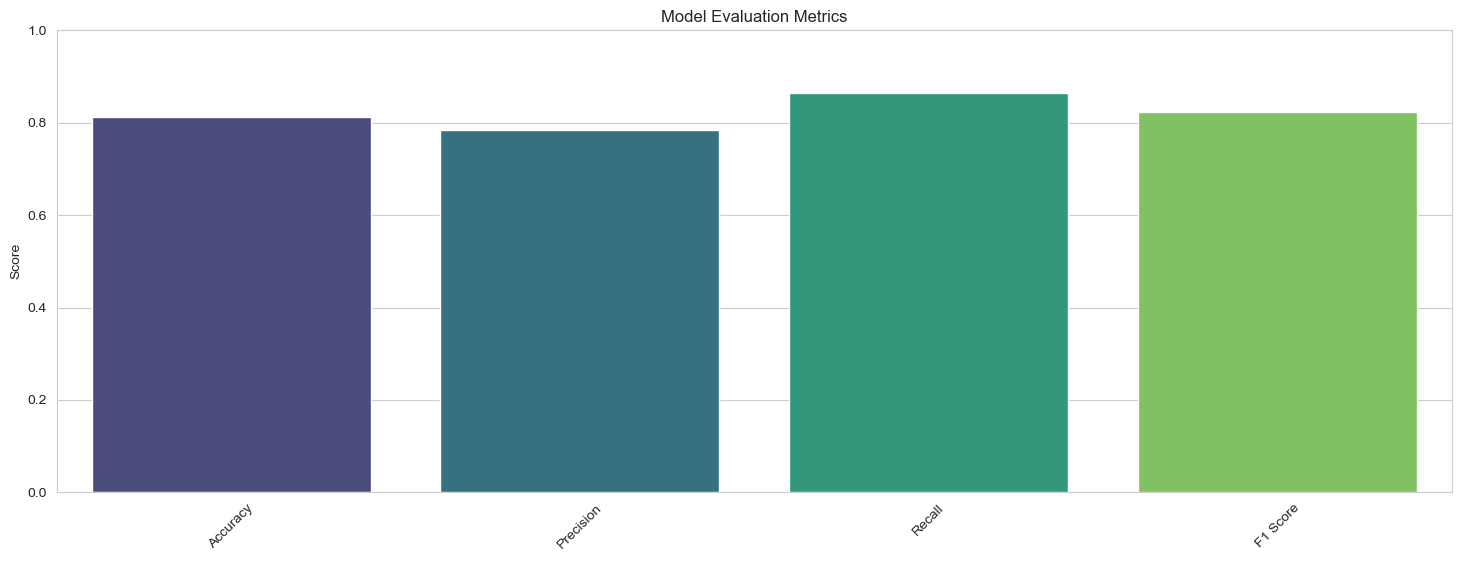

In [37]:
# Plot evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(18, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

0.8101851851851852
0.7883774749292878
|--- feature_1 <= 56.01
|   |--- feature_1 <= 44.22
|   |   |--- feature_1 <= 36.29
|   |   |   |--- class: 0
|   |   |--- feature_1 >  36.29
|   |   |   |--- class: 0
|   |--- feature_1 >  44.22
|   |   |--- feature_8 <= 25.10
|   |   |   |--- class: 0
|   |   |--- feature_8 >  25.10
|   |   |   |--- class: 0
|--- feature_1 >  56.01
|   |--- feature_5 <= 2.50
|   |   |--- feature_7 <= 126.62
|   |   |   |--- class: 1
|   |   |--- feature_7 >  126.62
|   |   |   |--- class: 1
|   |--- feature_5 >  2.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 0



[Text(0.5, 0.875, 'x[1] <= 56.013\ngini = 0.5\nsamples = 1944\nvalue = [980, 964]'),
 Text(0.25, 0.625, 'x[1] <= 44.222\ngini = 0.271\nsamples = 860\nvalue = [721, 139]'),
 Text(0.125, 0.375, 'x[1] <= 36.293\ngini = 0.104\nsamples = 564\nvalue = [533, 31]'),
 Text(0.0625, 0.125, 'gini = 0.029\nsamples = 408\nvalue = [402, 6]'),
 Text(0.1875, 0.125, 'gini = 0.269\nsamples = 156\nvalue = [131.0, 25.0]'),
 Text(0.375, 0.375, 'x[8] <= 25.101\ngini = 0.463\nsamples = 296\nvalue = [188, 108]'),
 Text(0.3125, 0.125, 'gini = 0.049\nsamples = 40\nvalue = [39, 1]'),
 Text(0.4375, 0.125, 'gini = 0.487\nsamples = 256\nvalue = [149, 107]'),
 Text(0.75, 0.625, 'x[5] <= 2.5\ngini = 0.364\nsamples = 1084\nvalue = [259, 825]'),
 Text(0.625, 0.375, 'x[7] <= 126.621\ngini = 0.309\nsamples = 899\nvalue = [172, 727]'),
 Text(0.5625, 0.125, 'gini = 0.383\nsamples = 530\nvalue = [137, 393]'),
 Text(0.6875, 0.125, 'gini = 0.172\nsamples = 369\nvalue = [35, 334]'),
 Text(0.875, 0.375, 'x[6] <= 0.5\ngini = 0.49

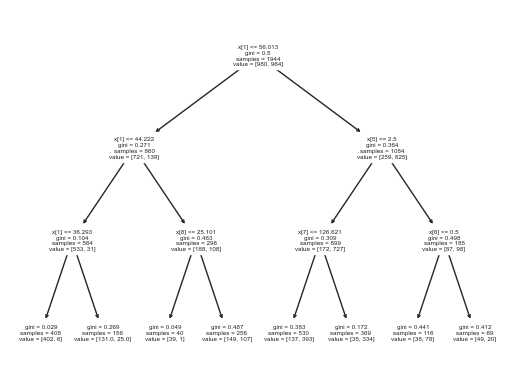

In [38]:
# Decision tree
#Create a Decision Tree classifier with the current max_depth
from sklearn import tree
DT=tr.DecisionTreeClassifier(max_depth=3)
DT.fit(x_train,y_train)
trACC=DT.score(x_train,y_train)
tesACC=DT.score(x_test,y_test)

print(trACC)
print(tesACC)
model = DT.fit(x_train, y_train)
text_representation = tr.export_text(DT)
print(text_representation)

# To Visualize Decision Tree
tree.plot_tree(model)

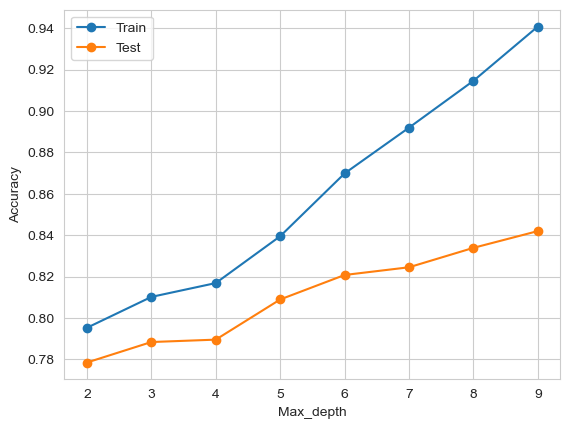

In [39]:
# Decision tree
trACC=[]
tesACC=[]
MD=[]

for i in range(2,10):
    #Create a Decision Tree classifier with the current max_depth
    DT=tr.DecisionTreeClassifier(max_depth=i)
    DT.fit(x_train,y_train)
    trACC.append(DT.score(x_train,y_train))
    tesACC.append(DT.score(x_test,y_test))
    MD.append(i)
#print(trACC)
#print(tesACC)
#print(MD)
plt.figure()
plt.plot(MD, trACC, label='Train',marker='o')
plt.plot(MD, tesACC, label='Test', marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#print(trACC)
#print(tesACC)

Accuracy: 0.7784777577783492
precision: 0.7426339285714286
Recall: 0.8537336412625096
F1: 0.794317774859735


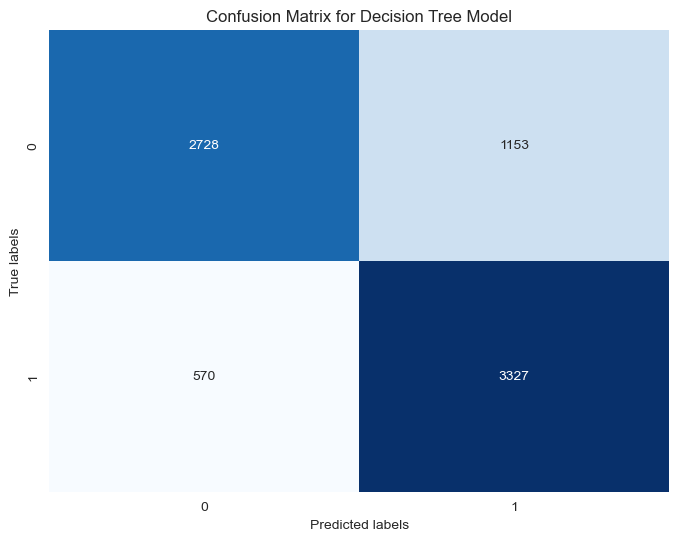

In [40]:
DT=tr.DecisionTreeClassifier(max_depth=2)
DT.fit(x_train,y_train)

# Train the model on the training data
DT.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = DT.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("precision:", precision)
print("Recall:", recall)
print("F1:", f1)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

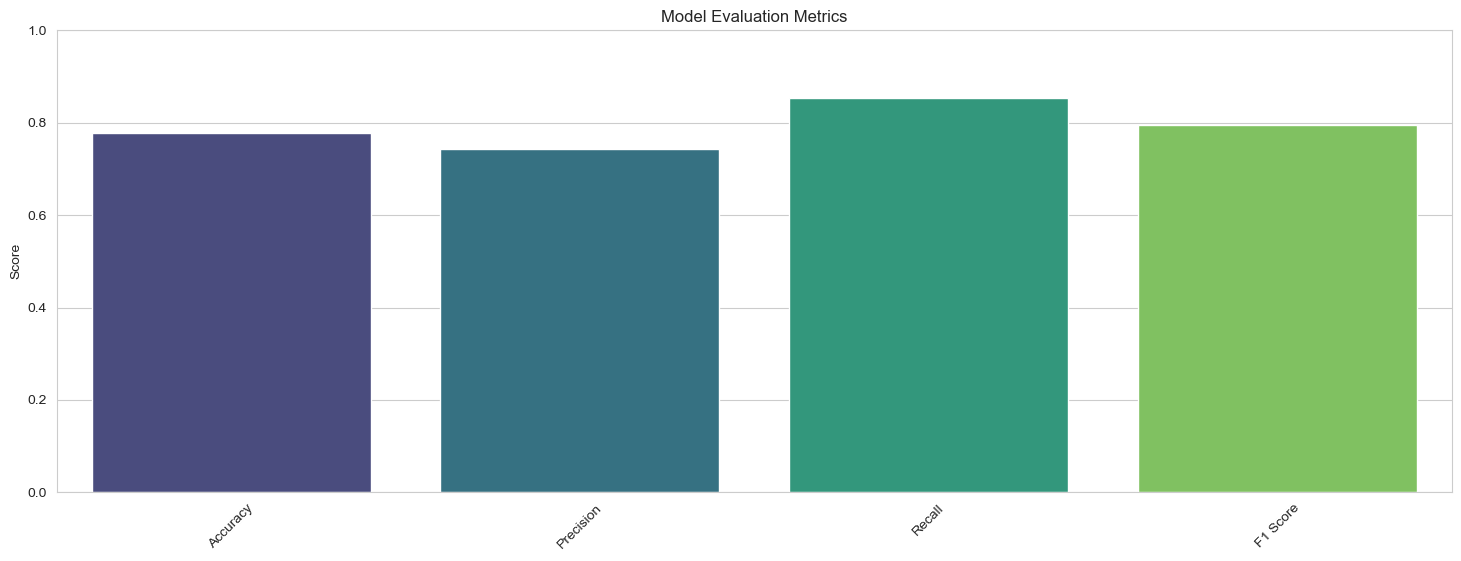

In [41]:
# Plot evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(18, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

Accuracy: 0.8062483929030599
precision: 0.7873977873977874
Recall: 0.8401334359763921
F1: 0.812911235257604


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


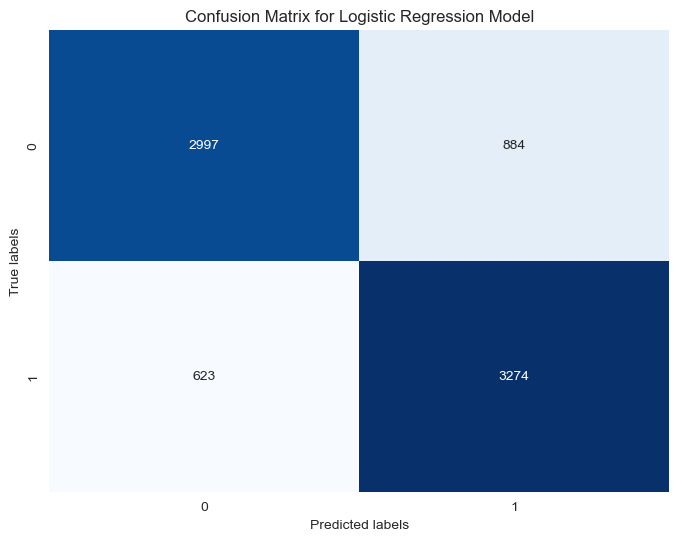

In [42]:
# Instantiate the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("precision:", precision)
print("Recall:", recall)
print("F1:", f1)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

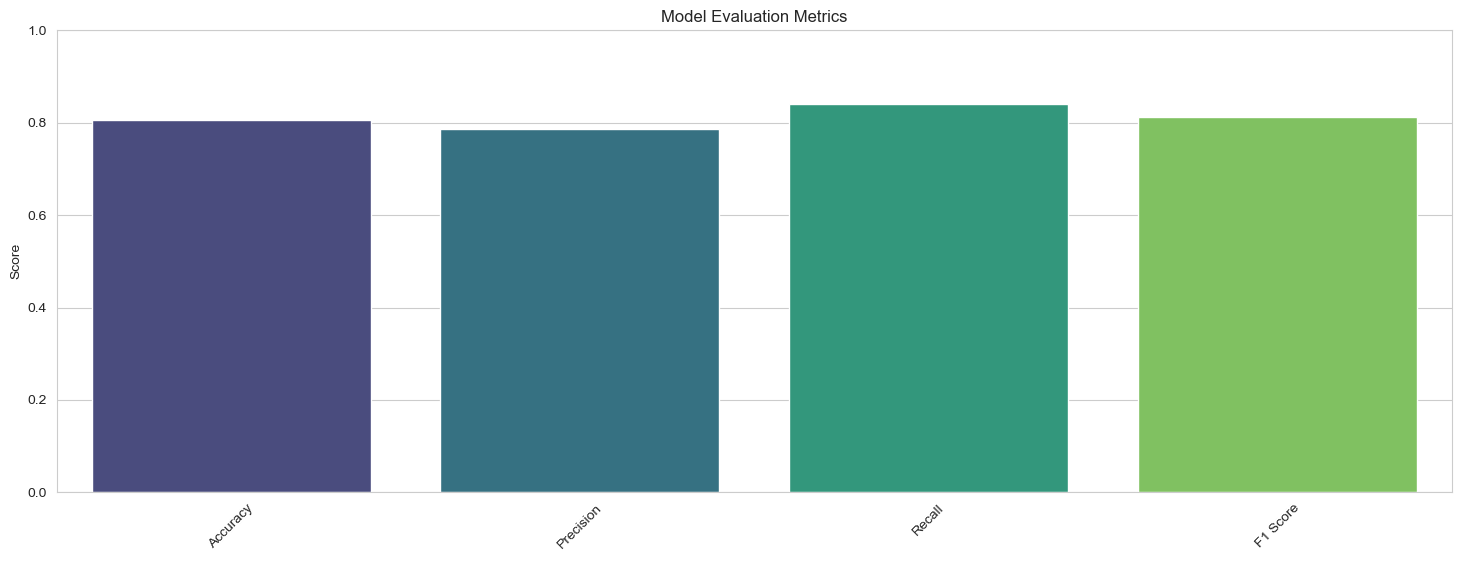

In [43]:
# Plot evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(18, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

Accuracy: 0.8066340961686809
precision: 0.7863125149557311
Recall: 0.8432127277392867
F1: 0.8137691926696384


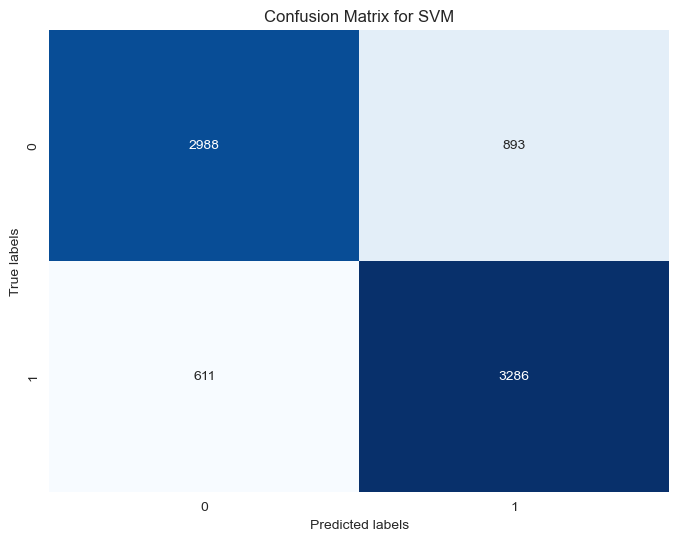

In [44]:
# Instantiate the SVM model
model = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("precision:", precision)
print("Recall:", recall)
print("F1:", f1)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM')
plt.show()

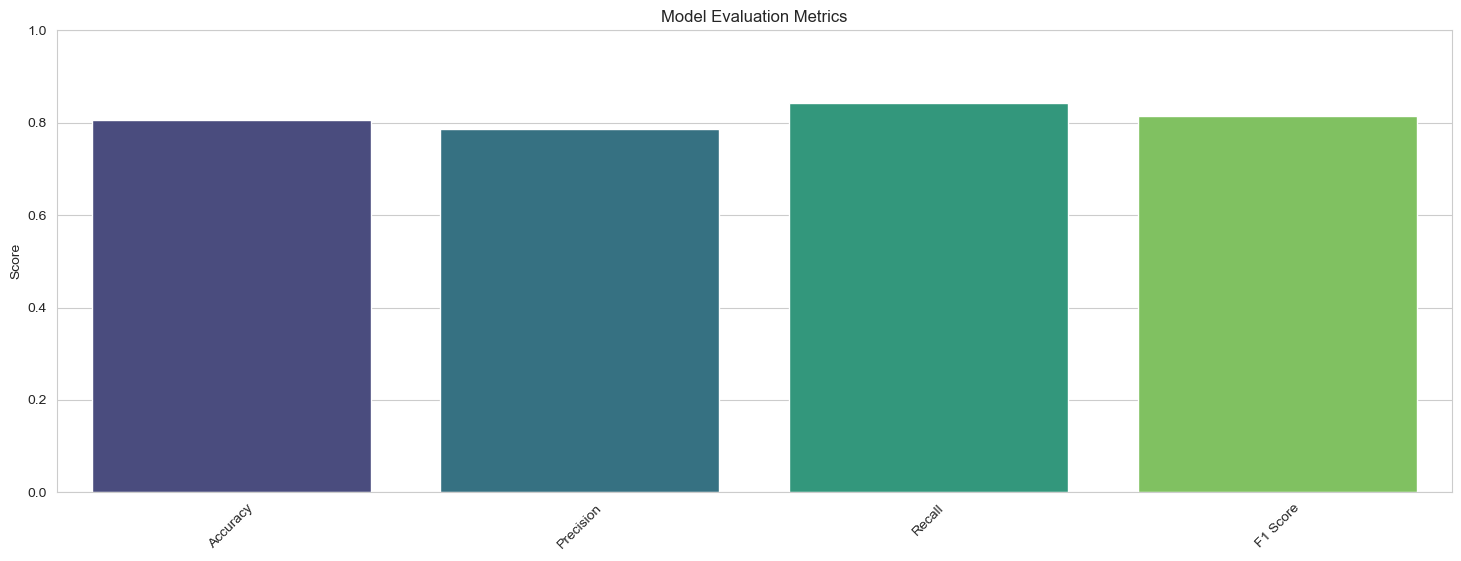

In [45]:
# Plot evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(18, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()